# MODEL DIABETES 2 (DROP DUPLIKAT,PERATAAN DATA,16664 DATA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
df1 = pd.read_csv('../data/diabetes/diabetes_012_health_indicators_BRFSS2015.csv')
df2 = pd.read_csv('../data/diabetes/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df3 = pd.read_csv('../data/diabetes/diabetes_binary_health_indicators_BRFSS2015.csv')

In [4]:
df1 = df1.drop(columns=['HighBP','HighChol','CholCheck','Stroke','HeartDiseaseorAttack','Fruits','AnyHealthcare','NoDocbcCost','GenHlth','MentHlth','PhysHlth','DiffWalk','Education','Income'])

In [5]:
df1.rename(columns={'Diabetes_012': 'Diabetes_binary'}, inplace=True)

In [6]:
df2 = df2.drop(columns=['HighBP','HighChol','CholCheck','Stroke','HeartDiseaseorAttack','Fruits','AnyHealthcare','NoDocbcCost','GenHlth','MentHlth','PhysHlth','DiffWalk','Education','Income'])

In [7]:
df3 = df3.drop(columns=['HighBP','HighChol','CholCheck','Stroke','HeartDiseaseorAttack','Fruits','AnyHealthcare','NoDocbcCost','GenHlth','MentHlth','PhysHlth','DiffWalk','Education','Income'])

In [8]:
df1['Diabetes_binary'].replace(2, 1, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_31796\3702795627.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Diabetes_binary'].replace(2, 1, inplace=True)


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Diabetes_binary    253680 non-null  float64
 1   BMI                253680 non-null  float64
 2   Smoker             253680 non-null  float64
 3   PhysActivity       253680 non-null  float64
 4   Veggies            253680 non-null  float64
 5   HvyAlcoholConsump  253680 non-null  float64
 6   Sex                253680 non-null  float64
 7   Age                253680 non-null  float64
dtypes: float64(8)
memory usage: 15.5 MB


In [10]:
df1['Diabetes_binary'].unique()

array([0., 1.])

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Diabetes_binary    70692 non-null  float64
 1   BMI                70692 non-null  float64
 2   Smoker             70692 non-null  float64
 3   PhysActivity       70692 non-null  float64
 4   Veggies            70692 non-null  float64
 5   HvyAlcoholConsump  70692 non-null  float64
 6   Sex                70692 non-null  float64
 7   Age                70692 non-null  float64
dtypes: float64(8)
memory usage: 4.3 MB


In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Diabetes_binary    253680 non-null  float64
 1   BMI                253680 non-null  float64
 2   Smoker             253680 non-null  float64
 3   PhysActivity       253680 non-null  float64
 4   Veggies            253680 non-null  float64
 5   HvyAlcoholConsump  253680 non-null  float64
 6   Sex                253680 non-null  float64
 7   Age                253680 non-null  float64
dtypes: float64(8)
memory usage: 15.5 MB


In [13]:
df_overall = pd.concat([df1, df2, df3], ignore_index=True)
print(df_overall.head())

   Diabetes_binary   BMI  Smoker  PhysActivity  Veggies  HvyAlcoholConsump  \
0              0.0  40.0     1.0           0.0      1.0                0.0   
1              0.0  25.0     1.0           1.0      0.0                0.0   
2              0.0  28.0     0.0           0.0      0.0                0.0   
3              0.0  27.0     0.0           1.0      1.0                0.0   
4              0.0  24.0     0.0           1.0      1.0                0.0   

   Sex   Age  
0  0.0   9.0  
1  0.0   7.0  
2  0.0   9.0  
3  0.0  11.0  
4  0.0  11.0  


In [14]:
for column in df_overall.columns:
    print(f"Kolom {column}: {df_overall[column].unique()}")

Kolom Diabetes_binary: [0. 1.]
Kolom BMI: [40. 25. 28. 27. 24. 30. 34. 26. 33. 21. 23. 22. 38. 32. 37. 31. 29. 20.
 35. 45. 39. 19. 47. 18. 36. 43. 55. 49. 42. 17. 16. 41. 44. 50. 59. 48.
 52. 46. 54. 57. 53. 14. 15. 51. 58. 63. 61. 56. 74. 62. 64. 66. 73. 85.
 60. 67. 65. 70. 82. 79. 92. 68. 72. 88. 96. 13. 81. 71. 75. 12. 77. 69.
 76. 87. 89. 84. 95. 98. 91. 86. 83. 80. 90. 78.]
Kolom Smoker: [1. 0.]
Kolom PhysActivity: [0. 1.]
Kolom Veggies: [1. 0.]
Kolom HvyAlcoholConsump: [0. 1.]
Kolom Sex: [0. 1.]
Kolom Age: [ 9.  7. 11. 10.  8. 13.  4.  6.  2. 12.  5.  1.  3.]


In [15]:
scaler = MinMaxScaler()
df_normalized = df_overall.copy()
df_normalized[['BMI', 'Age']] = scaler.fit_transform(df_overall[['BMI', 'Age']])

for column in df_normalized.columns:
    print(f"Kolom {column}: {df_normalized[column].unique()}")

Kolom Diabetes_binary: [0. 1.]
Kolom BMI: [0.3255814  0.15116279 0.18604651 0.1744186  0.13953488 0.20930233
 0.25581395 0.1627907  0.24418605 0.10465116 0.12790698 0.11627907
 0.30232558 0.23255814 0.29069767 0.22093023 0.19767442 0.09302326
 0.26744186 0.38372093 0.31395349 0.08139535 0.40697674 0.06976744
 0.27906977 0.36046512 0.5        0.43023256 0.34883721 0.05813953
 0.04651163 0.3372093  0.37209302 0.44186047 0.54651163 0.41860465
 0.46511628 0.39534884 0.48837209 0.52325581 0.47674419 0.02325581
 0.03488372 0.45348837 0.53488372 0.59302326 0.56976744 0.51162791
 0.72093023 0.58139535 0.60465116 0.62790698 0.70930233 0.84883721
 0.55813953 0.63953488 0.61627907 0.6744186  0.81395349 0.77906977
 0.93023256 0.65116279 0.69767442 0.88372093 0.97674419 0.01162791
 0.80232558 0.68604651 0.73255814 0.         0.75581395 0.6627907
 0.74418605 0.87209302 0.89534884 0.8372093  0.96511628 1.
 0.91860465 0.86046512 0.8255814  0.79069767 0.90697674 0.76744186]
Kolom Smoker: [1. 0.]
Kolom 

In [19]:
unique_values = df_normalized['Diabetes_binary'].value_counts()
print("Nilai unik pada kolom 'Diabetes_binary' dan jumlahnya:")
print(unique_values)
print(len(df_normalized))

Nilai unik pada kolom 'Diabetes_binary' dan jumlahnya:
Diabetes_binary
0.0    10585
1.0     6079
Name: count, dtype: int64
16664


In [17]:
print('Semua Kolom')
print(df_overall.columns)
print("Jumlah nilai null di setiap kolom:")
print(df_overall.isnull().sum())
duplicate_rows = df_normalized.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_rows}")

Semua Kolom
Index(['Diabetes_binary', 'BMI', 'Smoker', 'PhysActivity', 'Veggies',
       'HvyAlcoholConsump', 'Sex', 'Age'],
      dtype='object')
Jumlah nilai null di setiap kolom:
Diabetes_binary      0
BMI                  0
Smoker               0
PhysActivity         0
Veggies              0
HvyAlcoholConsump    0
Sex                  0
Age                  0
dtype: int64
Jumlah baris duplikat: 561388


In [18]:
df_normalized = df_normalized.drop_duplicates()
duplicate_rows_after = df_normalized.duplicated().sum()
print(f"Jumlah baris duplikat setelah penghapusan: {duplicate_rows_after}")
len(df_normalized)

Jumlah baris duplikat setelah penghapusan: 0


16664

In [20]:
from sklearn.utils import resample

# Memisahkan data berdasarkan kelas
df_majority = df_normalized[df_normalized['Diabetes_binary'] == 0.0]
df_minority = df_normalized[df_normalized['Diabetes_binary'] == 1.0]
df_majority_downsampled = resample(df_majority,
                                   replace=False,  
                                   n_samples=len(df_minority),  
                                   random_state=42)  
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Mengecek hasil
unique_values_balanced = df_balanced['Diabetes_binary'].value_counts()
print("Nilai unik pada kolom 'Diabetes_binary' dan jumlahnya setelah diratakan:")
print(unique_values_balanced)
print(len(df_balanced))


Nilai unik pada kolom 'Diabetes_binary' dan jumlahnya setelah diratakan:
Diabetes_binary
0.0    6079
1.0    6079
Name: count, dtype: int64
12158


## Heatmap

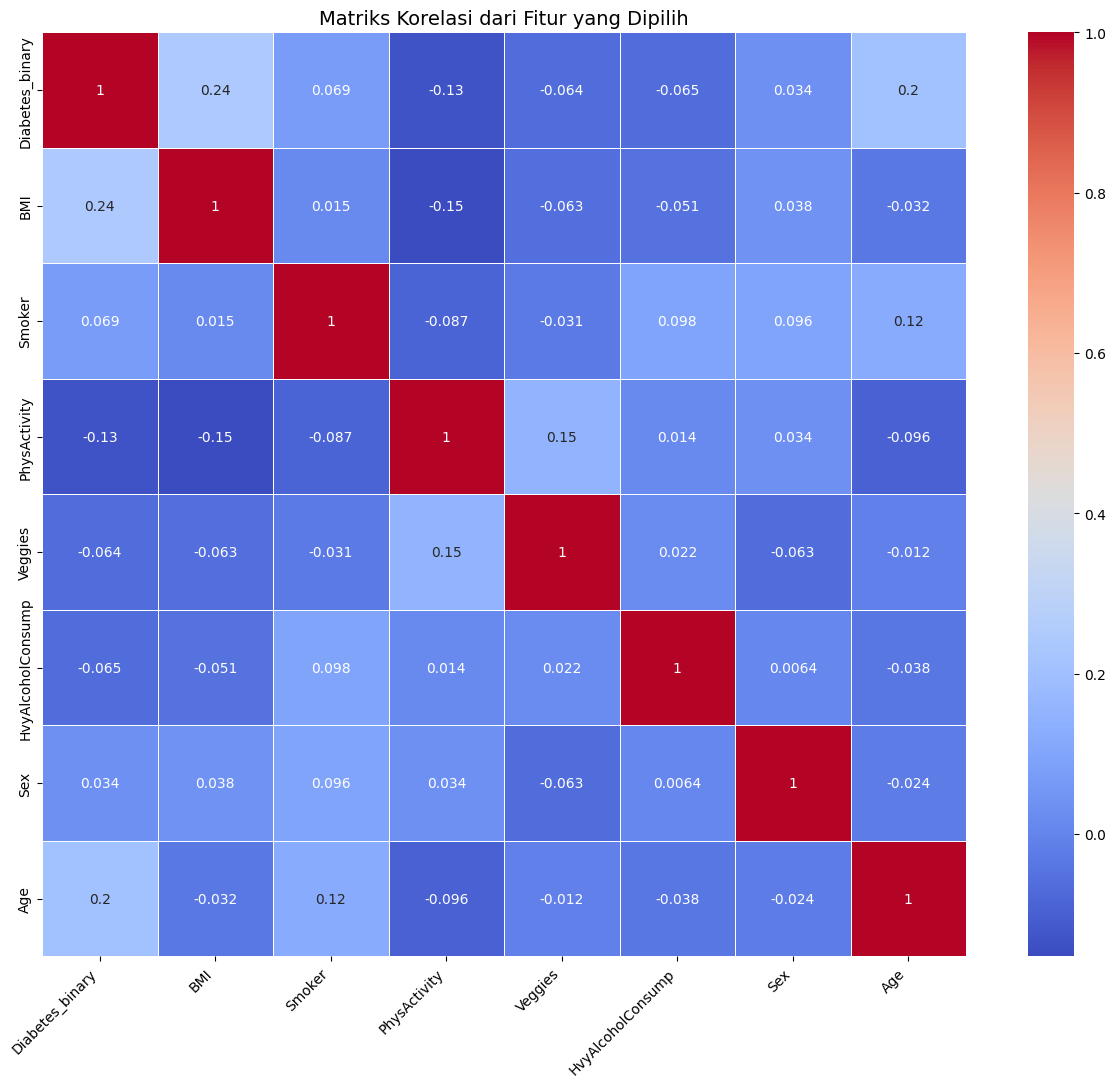

In [135]:
corr_matrix = df_overall.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, square=True)
plt.xticks(rotation=45, ha='right')
plt.title('Matriks Korelasi dari Fitur yang Dipilih', fontsize=14)
plt.show()

In [136]:
summary_df = pd.DataFrame({
    'Column': df_overall.columns,
    'Max': df_overall.max().values,
    'Min': df_overall.min().values
})
summary_df

,Column,Max,Min
0,Diabetes_binary,1.0,0.0
1,BMI,98.0,12.0
2,Smoker,1.0,0.0
3,PhysActivity,1.0,0.0
4,Veggies,1.0,0.0
5,HvyAlcoholConsump,1.0,0.0
6,Sex,1.0,0.0
7,Age,13.0,1.0


In [137]:
print('df1')
for col in df_overall.columns:
    print(f"{col}: {df_overall[col].unique()}")

df1
Diabetes_binary: [0. 1.]
BMI: [40. 25. 28. 27. 24. 30. 34. 26. 33. 21. 23. 22. 38. 32. 37. 31. 29. 20.
 35. 45. 39. 19. 47. 18. 36. 43. 55. 49. 42. 17. 16. 41. 44. 50. 59. 48.
 52. 46. 54. 57. 53. 14. 15. 51. 58. 63. 61. 56. 74. 62. 64. 66. 73. 85.
 60. 67. 65. 70. 82. 79. 92. 68. 72. 88. 96. 13. 81. 71. 75. 12. 77. 69.
 76. 87. 89. 84. 95. 98. 91. 86. 83. 80. 90. 78.]
Smoker: [1. 0.]
PhysActivity: [0. 1.]
Veggies: [1. 0.]
HvyAlcoholConsump: [0. 1.]
Sex: [0. 1.]
Age: [ 9.  7. 11. 10.  8. 13.  4.  6.  2. 12.  5.  1.  3.]


## SPLIT DATA

In [21]:
data_array = df_balanced.to_numpy()
labels = data_array[:, 0]  
features = data_array[:, 1:]
x_train, x_cv, y_train, y_cv = train_test_split(features, labels, test_size=0.2, random_state=42)
y_train = y_train.reshape(-1, 1)
y_cv = y_cv.reshape(-1, 1)
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_cv shape: {x_cv.shape}, y_cv shape: {y_cv.shape}")

x_train shape: (9726, 7), y_train shape: (9726, 1)
x_cv shape: (2432, 7), y_cv shape: (2432, 1)


In [22]:
df_normalized.columns.tolist()

['Diabetes_binary',
 'BMI',
 'Smoker',
 'PhysActivity',
 'Veggies',
 'HvyAlcoholConsump',
 'Sex',
 'Age']

In [23]:
model = tf.keras.Sequential([
    layers.InputLayer(input_shape=(x_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [24]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)  
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
print(y_train.shape)
print(x_train.shape)

(9726, 1)
(9726, 7)


In [26]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

In [27]:
history = model.fit(x_train, y_train, validation_data=(x_cv, y_cv), epochs=50, callbacks=[early_stopping])

Epoch 1/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5237 - loss: 0.6917 - val_accuracy: 0.6168 - val_loss: 0.6756
Epoch 2/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5836 - loss: 0.6730 - val_accuracy: 0.6106 - val_loss: 0.6634
Epoch 3/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6190 - loss: 0.6578 - val_accuracy: 0.6172 - val_loss: 0.6556
Epoch 4/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6007 - loss: 0.6624 - val_accuracy: 0.6160 - val_loss: 0.6560
Epoch 5/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6050 - loss: 0.6586 - val_accuracy: 0.6151 - val_loss: 0.6535
Epoch 6/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6094 - loss: 0.6553 - val_accuracy: 0.6147 - val_loss: 0.6532
Epoch 7/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6155 - loss: 0.6540 - val_accuracy: 0.6090 - val_loss: 0.6586
Epoch 8/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6144 - loss: 0.6556 - val_accuracy: 0.

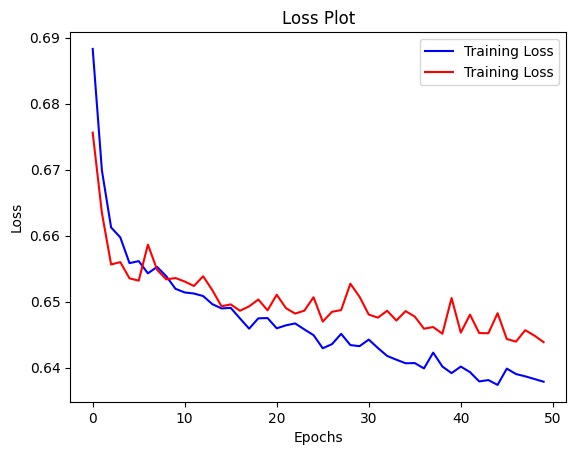

In [28]:
plt.title('Loss Plot')
plt.plot(history.history['loss'],'b', label='Training Loss')
plt.plot(history.history['val_loss'],'r',label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [32]:
def predict_diabetes(model, input_data):
    # Melakukan prediksi untuk mendapatkan probabilitas risiko diabetes
    prob = model.predict(input_data)[:, 0]  # Probabilitas kelas 0 (Negatif) atau 1 (Positif)

    status = 'Positif' if prob >= 0.65 else 'Negatif' 
    
    return status, prob[0]

In [33]:
def normalize_bmi_age(sample, df_overall):
    bmi_min, bmi_max = df_overall['BMI'].min(), df_overall['BMI'].max()
    age_min, age_max = df_overall['Age'].min(), df_overall['Age'].max()
    sample[:, 0] = (sample[:, 0] - bmi_min) / (bmi_max - bmi_min)
    sample[:, -1] = (sample[:, -1] - age_min) / (age_max - age_min)
    
    return sample

In [34]:
sample_input_1 = np.array([[40.,  1.,  0.,  1.,  0.,  0., 9.]])   # Positif
sample_input_2 = np.array([[24.,  0.,  1.,  1.,  0.,  0., 11.]])   # Positif
sample_input_3 = np.array([[28.,  0.,  0.,  1.,  0.,  0., 11.]])   # NEGATIF
sample_input_4 = np.array([[27.,  0.,  1.,  1.,  0.,  1., 13.]])   # NEGATIF
sample_input_1 = normalize_bmi_age(sample_input_1, df_overall)
sample_input_2 = normalize_bmi_age(sample_input_2, df_overall)
sample_input_3 = normalize_bmi_age(sample_input_3, df_overall)
sample_input_4 = normalize_bmi_age(sample_input_4, df_overall)
print("Sample 1 setelah normalisasi:", sample_input_1)
print("Sample 2 setelah normalisasi:", sample_input_2)
print("Sample 3 setelah normalisasi:", sample_input_3)
print("Sample 4 setelah normalisasi:", sample_input_4)

status_1, prob_1 = predict_diabetes(model, sample_input_1)
status_2, prob_2 = predict_diabetes(model, sample_input_2)
status_3, prob_3 = predict_diabetes(model, sample_input_3)
status_4, prob_4 = predict_diabetes(model, sample_input_4)

# Menampilkan hasil
print(f"Sample 1 - Probabilitas risiko diabetes: {prob_1:.4f}, Status: {status_1}")
print(f"Sample 2 - Probabilitas risiko diabetes: {prob_2:.4f}, Status: {status_2}")
print(f"Sample 3 - Probabilitas risiko diabetes: {prob_3:.4f}, Status: {status_3}")
print(f"Sample 4 - Probabilitas risiko diabetes: {prob_4:.4f}, Status: {status_4}")

Sample 1 setelah normalisasi: [[0.3255814  1.         0.         1.         0.         0.
  0.66666667]]
Sample 2 setelah normalisasi: [[0.13953488 0.         1.         1.         0.         0.
  0.83333333]]
Sample 3 setelah normalisasi: [[0.18604651 0.         0.         1.         0.         0.
  0.83333333]]
Sample 4 setelah normalisasi: [[0.1744186 0.        1.        1.        0.        1.        1.       ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Sample 1 - Probabilitas risiko diabetes: 0.6836, Status: Positif
Sample 2 - Probabilitas risiko diabetes: 0.5820, Status: Negatif
Sample 3 - Probabilitas risiko diabetes: 0.6106, Status: Negatif
Sample 4 - Probabilitas risiko diabetes: 0.6167, Status: Negatif


In [35]:
df_zero_diabetes = df_overall[df_overall['Diabetes_binary'] == 0]
print(df_zero_diabetes.head()) 
df_one_diabetes = df_overall[df_overall['Diabetes_binary'] == 1]
print(df_one_diabetes.head()) 

   Diabetes_binary   BMI  Smoker  PhysActivity  Veggies  HvyAlcoholConsump  \
0              0.0  40.0     1.0           0.0      1.0                0.0   
1              0.0  25.0     1.0           1.0      0.0                0.0   
2              0.0  28.0     0.0           0.0      0.0                0.0   
3              0.0  27.0     0.0           1.0      1.0                0.0   
4              0.0  24.0     0.0           1.0      1.0                0.0   

   Sex   Age  
0  0.0   9.0  
1  0.0   7.0  
2  0.0   9.0  
3  0.0  11.0  
4  0.0  11.0  
    Diabetes_binary   BMI  Smoker  PhysActivity  Veggies  HvyAlcoholConsump  \
8               1.0  30.0     1.0           0.0      1.0                0.0   
10              1.0  25.0     1.0           1.0      1.0                0.0   
13              1.0  28.0     0.0           0.0      1.0                0.0   
17              1.0  23.0     1.0           1.0      0.0                0.0   
23              1.0  27.0     0.0           1.